### EDA

In [2]:
#importar librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# leer el dataset
df_raw = pd.read_json("../data/MLA_100k.jsonlines", lines=True)

In [4]:
df_raw.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
base_price,100000.0,5.252423e+04,8.623127e+06,0.84,90.0,250.0,8.000000e+02,2.222222e+09
seller_id,100000.0,8.425269e+07,5.497257e+07,1304.00,39535905.5,76310627.0,1.325659e+08,1.946906e+08
price,100000.0,5.252433e+04,8.623127e+06,0.84,90.0,250.0,8.000000e+02,2.222222e+09
official_store_id,818.0,2.064438e+02,1.282530e+02,1.00,84.0,216.0,3.127500e+02,4.460000e+02
differential_pricing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_price,143.0,1.593342e+03,2.245798e+03,120.00,449.0,858.0,1.500000e+03,1.399900e+04
catalog_product_id,11.0,3.727643e+06,1.884698e+06,94404.00,3050701.5,5093232.0,5.103216e+06,5.434513e+06
subtitle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
initial_quantity,100000.0,3.509337e+01,4.210762e+02,1.00,1.0,1.0,2.000000e+00,9.999000e+03
sold_quantity,100000.0,2.396990e+00,4.268508e+01,0.00,0.0,0.0,0.000000e+00,8.676000e+03


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

Información general

In [8]:
# Mostrar las primeras 5 filas
print(df_raw.head())

# Mostrar las últimas 5 filas
print(df_raw.tail())

# Información general del DataFrame
print(df_raw.info())

# Descripción estadística de variables numéricas
print(df_raw.describe())


                                      seller_address            warranty  \
0  {'comment': '', 'longitude': -58.3986709, 'id'...                None   
1  {'comment': '', 'longitude': -58.5059173, 'id'...  NUESTRA REPUTACION   
2  {'comment': '', 'longitude': -58.4143948, 'id'...                None   
3  {'comment': '', 'longitude': -58.4929208, 'id'...                None   
4  {'comment': '', 'longitude': -58.5495042, 'id'...      MI REPUTACION.   

  sub_status condition seller_contact deal_ids  base_price  \
0         []       new           None       []        80.0   
1         []      used           None       []      2650.0   
2         []      used           None       []        60.0   
3         []       new           None       []       580.0   
4         []      used           None       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2 

Dimensiones del dataset

In [9]:
print(f'Número de filas: {df_raw.shape[0]}')
print(f'Número de columnas: {df_raw.shape[1]}')

Número de filas: 100000
Número de columnas: 48


Nombres de columnas y tipos de datos

In [10]:
print(df_raw.columns)
print(df_raw.dtypes)


Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')
seller_address                                   object
warranty                                         object
sub_status        

Limpieza de Datos
Manejo de Valores Faltantes
Visualización de Valores Faltantes

seller_address                           0
warranty                             60896
sub_status                               0
condition                                0
seller_contact                       97781
deal_ids                                 0
base_price                               0
shipping                                 0
non_mercado_pago_payment_methods         0
seller_id                                0
variations                               0
location                                 0
site_id                                  0
listing_type_id                          0
price                                    0
attributes                               0
buying_mode                              0
tags                                     0
listing_source                           0
parent_item_id                       23011
coverage_areas                           0
category_id                              0
descriptions                             0
last_update

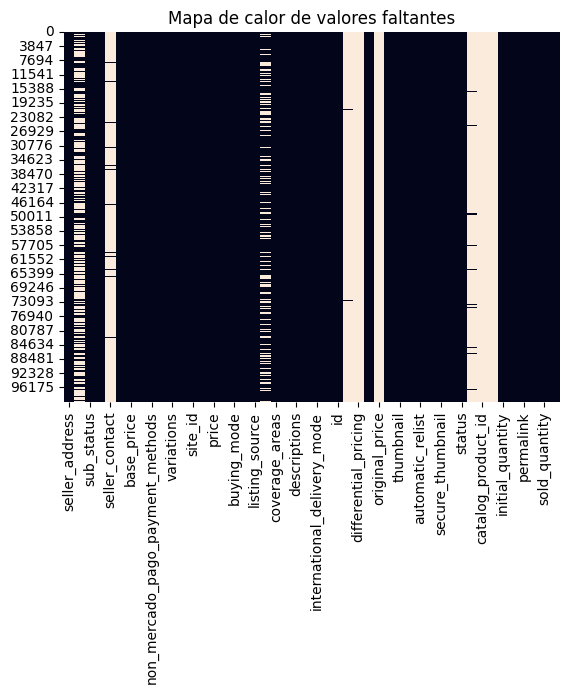

In [11]:
# Revisar valores faltantes
print(df_raw.isnull().sum())

# Visualización de valores faltantes
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()

Elija algunas columnas para eliminar, como identificadores que no nos brindan información relevante y columnas que tienen muchos datos nulos.

In [67]:
columns = ["warranty",
           "seller_contact",
           "deal_ids",
           "seller_id",
           "site_id",
           "listing_type_id",
           "parent_item_id",
           "category_id",
           "id",
           "seller_address",
            "sub_status",
            "variations",
            "location",
            "attributes",
            "tags",
            "listing_source",
            "coverage_areas",
            "international_delivery_mode",
            "pictures",
            "thumbnail",
            "automatic_relist",
            "secure_thumbnail",
            "permalink",
            "geolocation",
            "title",
           "official_store_id",
           "differential_pricing",
           "original_price",
           "currency_id",
           "video_id",
           "catalog_product_id",
           "subtitle"]

df_cleaned = df_raw.drop(columns=(columns))

In [68]:
num_filas, num_columnas = df_cleaned.shape

print(f"el DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

el DataFrame tiene 100000 filas y 16 columnas.


In [72]:
# Convertir las columnas de fecha a datetime y luego al formato YYYYMMDD
fecha_columnas = ['last_updated', 'date_created', 'start_time', 'stop_time']

for col in fecha_columnas:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col]).dt.strftime('%Y%m%d')

# Mostrar las columnas transformadas
print(df_cleaned[fecha_columnas])

      last_updated date_created start_time stop_time
0         20150905     20150905   20150905  20151104
1         20150926     20150926   20150926  20151125
2         20150909     20150909   20150909  20151108
3         20151005     20150928   20150928  20151204
4         20150828     20150824   20150824  20151023
...            ...          ...        ...       ...
99995     20150928     20150928   20150928  20151127
99996     20150911     20150911   20150911  20151110
99997     20150906     20150906   20150906  20151105
99998     20150818     20150818   20150818  20151017
99999     20150921     20150921   20150921  20151120

[100000 rows x 4 columns]


In [69]:
numericas = df_raw.select_dtypes(include=np.number).columns.tolist()

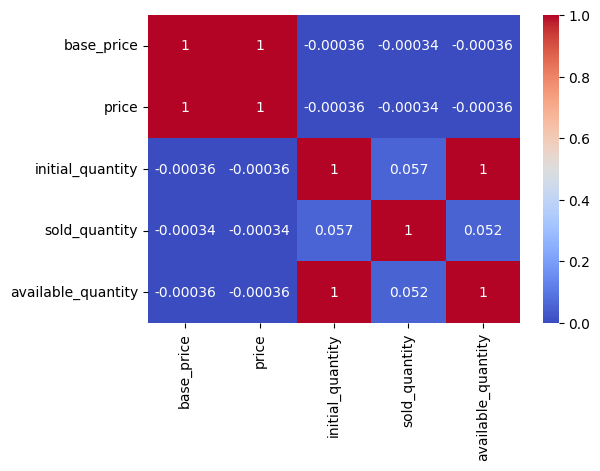

In [70]:
# Calcular la matriz de correlación de las variables numéricas
numeric_columns = ['base_price', 'price', 'initial_quantity', 'sold_quantity', 'available_quantity']
correlation_matrix = df_raw[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Histograma de las variables numéricas

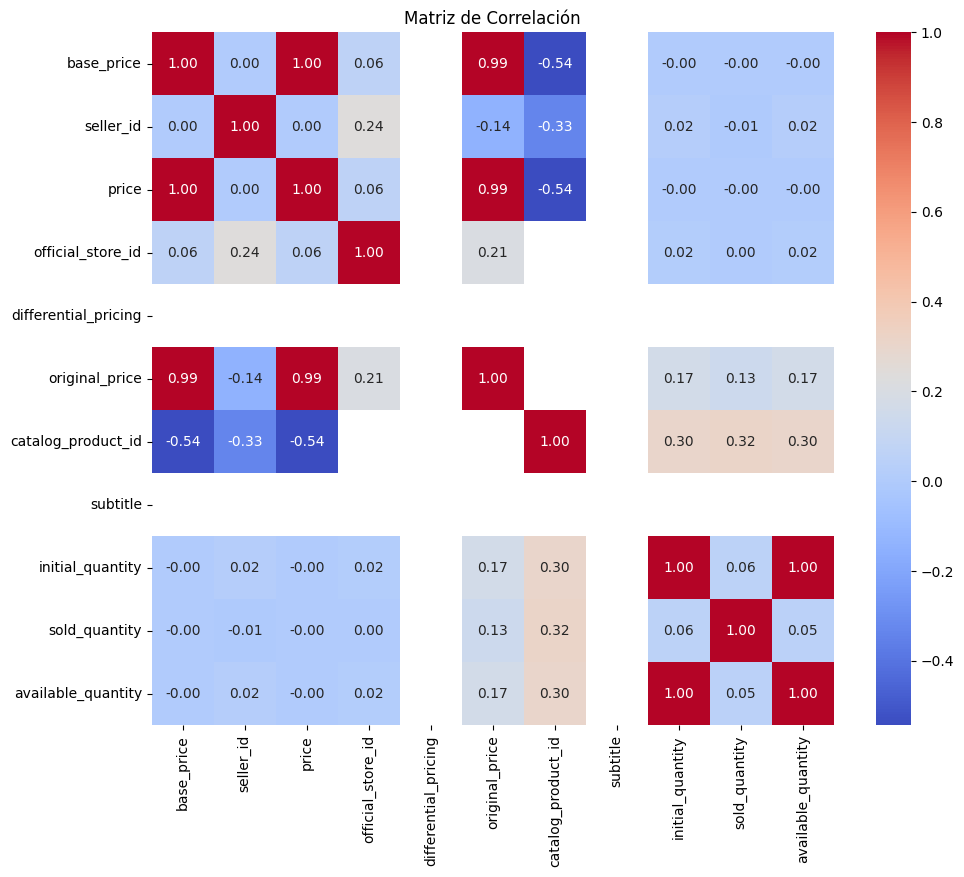

In [24]:
corr = df_raw[numericas].corr()
plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

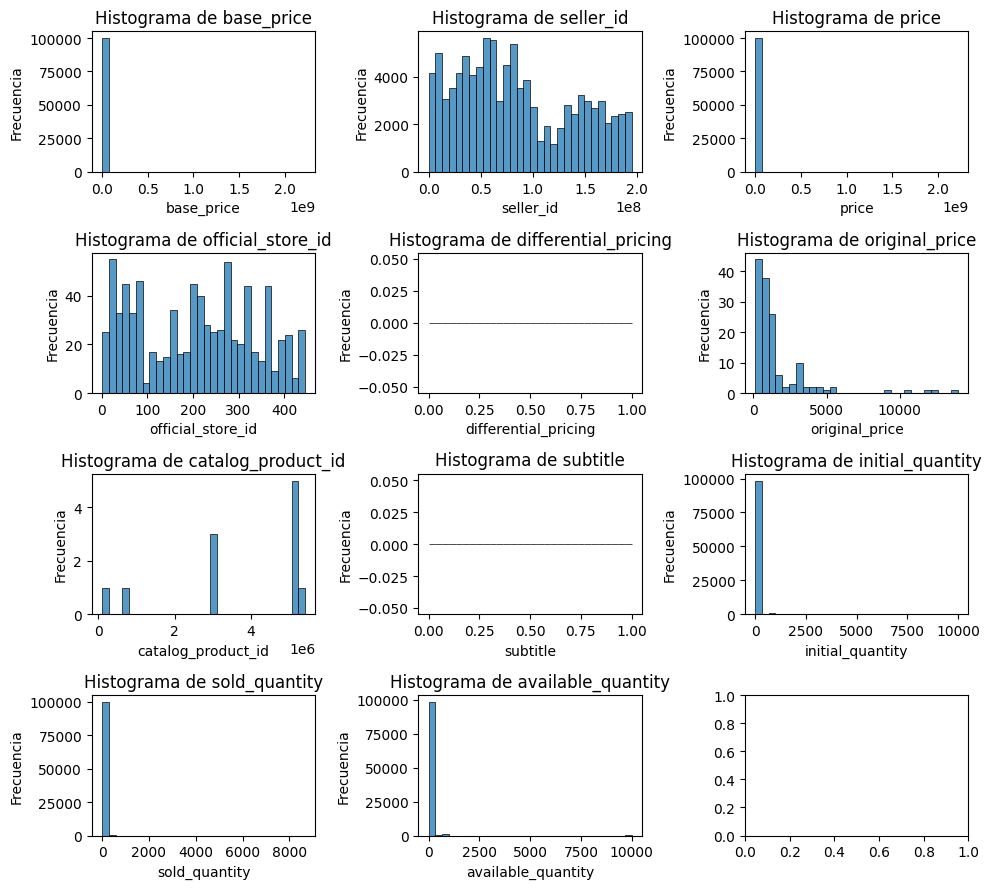

In [62]:
# Definir el número de columnas para el layout del grid de subplots
num_cols = 3
num_rows = int(np.ceil(len(numericas) / num_cols))

# Crear una figura con subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 9))
axes = axes.flatten()

# Iterar sobre las columnas numéricas y generar los histogramas
for i, col in enumerate(numericas):
    sns.histplot(df_raw[col], bins=30, ax=axes[i], kde=False) 
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ajustar el layout para que no haya solapamientos
plt.tight_layout()
plt.show()

Definir las variables categóricas

In [29]:
categoricas = df_raw.select_dtypes(include='object').columns.tolist()

print("Variables categóricas:", categoricas)

Variables categóricas: ['seller_address', 'warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids', 'shipping', 'non_mercado_pago_payment_methods', 'variations', 'location', 'site_id', 'listing_type_id', 'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated', 'international_delivery_mode', 'pictures', 'id', 'currency_id', 'thumbnail', 'title', 'date_created', 'secure_thumbnail', 'status', 'video_id', 'permalink', 'geolocation']


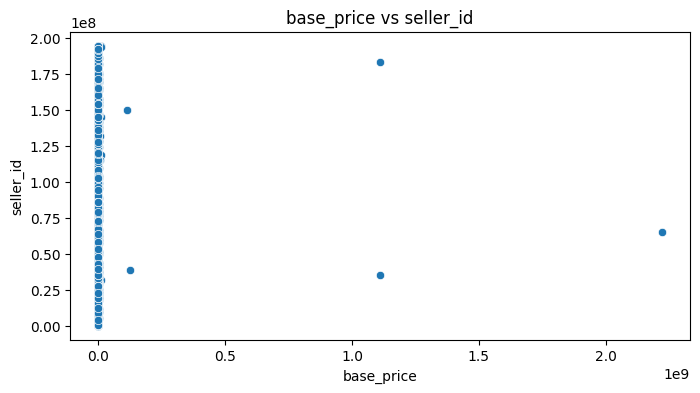

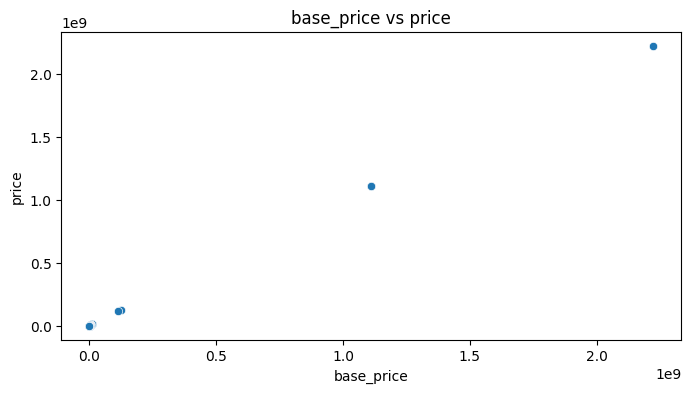

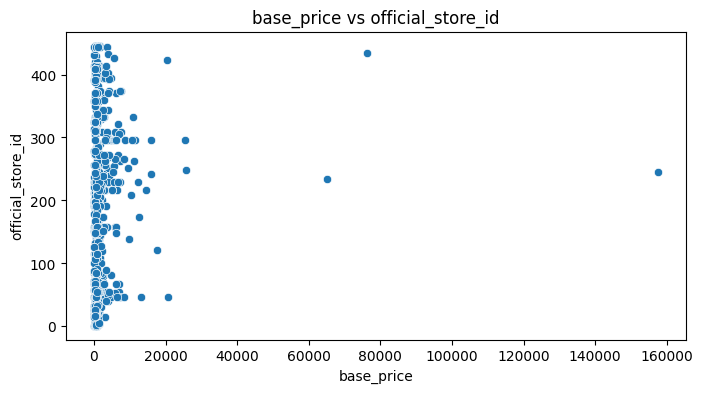

In [52]:
# Diagrama de dispersión entre los primeros 4 pares de variables numéricas
count = 0  # Contador para controlar la cantidad de gráficos
for i in range(len(numericas)):
    for j in range(i+1, len(numericas)):
        if count < 3:  # Limitar a 4 gráficos
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=df_raw[numericas[i]], y=df_raw[numericas[j]])
            plt.title(f'{numericas[i]} vs {numericas[j]}')
            plt.show()
            count += 1  # Incrementar el contador
        else:
            break

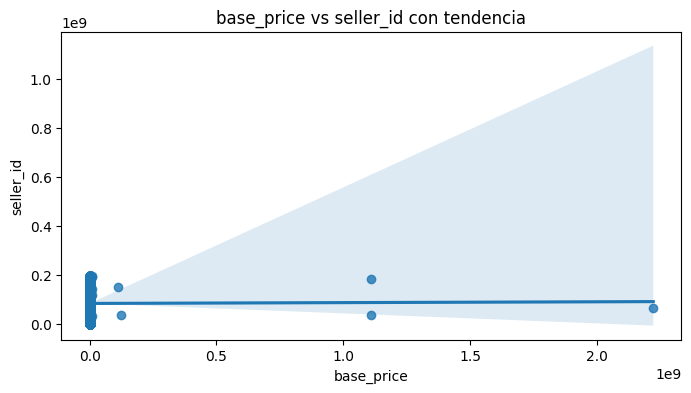

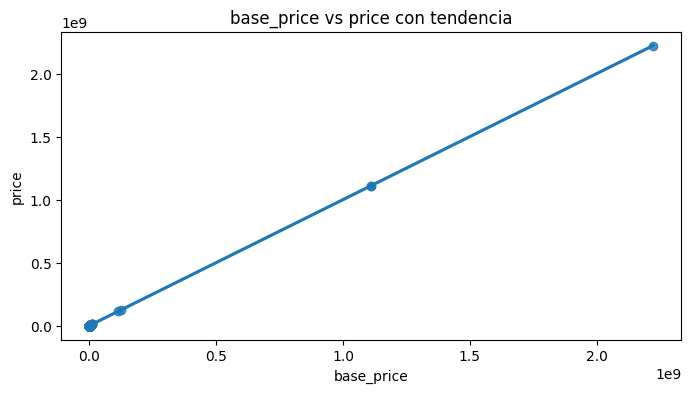

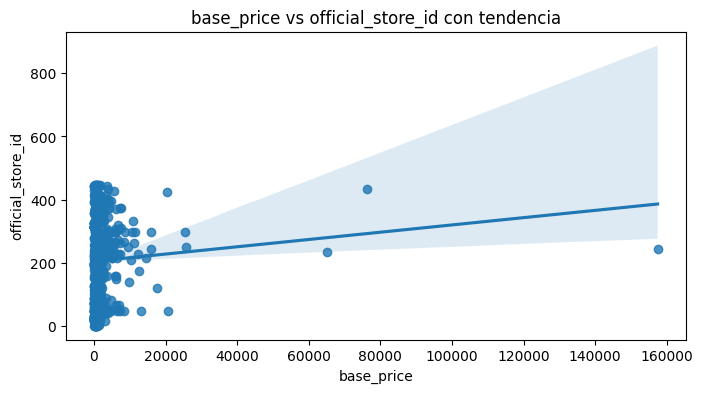

In [51]:
# Scatter plot con línea de regresión para los primeros 4 pares de variables numéricas
count = 0  # Contador para controlar la cantidad de gráficos
for i in range(len(numericas)):
    for j in range(i+1, len(numericas)):
        if count < 3:  # Limitar a 4 gráficos
            plt.figure(figsize=(8, 4))
            sns.regplot(x=df_raw[numericas[i]], y=df_raw[numericas[j]])
            plt.title(f'{numericas[i]} vs {numericas[j]} con tendencia')
            plt.show()
            count += 1  # Incrementar el contador
        else:
            break


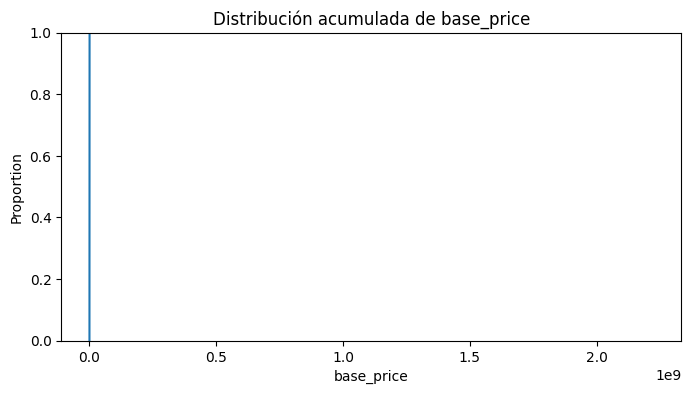

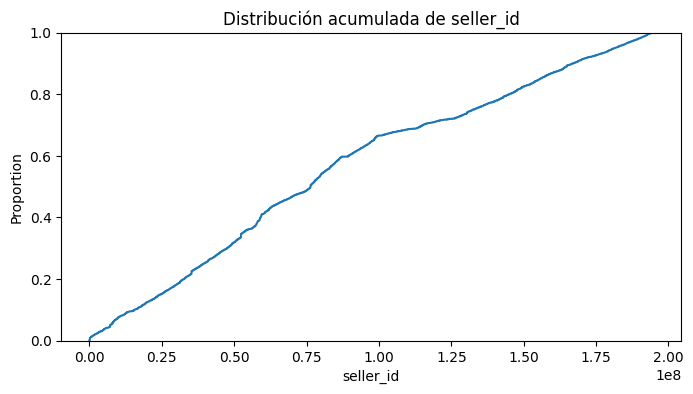

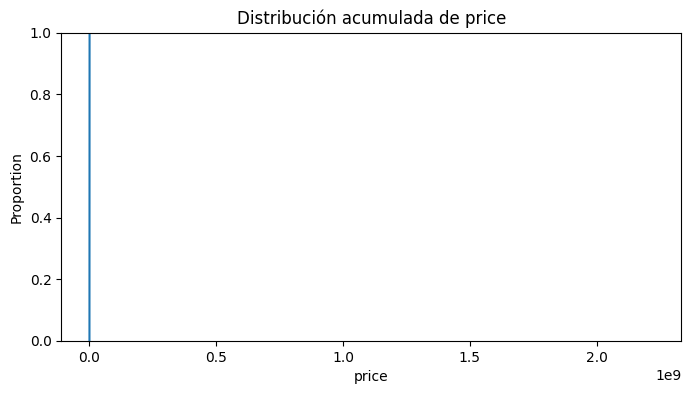

In [55]:
# Gráfico de distribución acumulada para las primeras 4 variables numéricas
count = 0  # Contador para controlar la cantidad de gráficos
for col in numericas:
    if count < 3:  # Limitar a 4 gráficos
        plt.figure(figsize=(8, 4))
        sns.ecdfplot(df_raw[col])
        plt.title(f'Distribución acumulada de {col}')
        plt.show()
        count += 1
    else:
        break


Guardar el dataset limpio

In [ ]:
df_cleaned.to_csv("../data/MLA_100k_clean.csv", index=False)